In [61]:
import pandas as pd

In [62]:
data = pd.read_excel('TOTAL drc.xlsx')

In [63]:
data

,V0001,V0026,V0031,A005010,A009010,A01501,C006,C008,C009,I00102,...,S083,T004,T005,Y001,Y00101,Y002,Y003,Y004,H001,VDR001
0,11,1,1,2,1,3.0,1,61,1,2,...,NaN,2,NaN,4.0,NaN,3.0,NaN,NaN,4.0,NaN
1,11,1,1,1,1,1.0,2,57,4,2,...,NaN,2,NaN,3.0,NaN,3.0,NaN,NaN,4.0,NaN
2,11,1,1,2,5,4.0,2,21,4,1,...,NaN,2,NaN,1.0,16.0,1.0,2.0,1.0,1.0,6.0
3,11,1,1,2,1,3.0,2,41,2,2,...,NaN,2,NaN,4.0,NaN,1.0,3.0,NaN,3.0,NaN
4,11,1,1,2,1,3.0,1,51,2,2,...,NaN,2,NaN,4.0,NaN,2.0,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,53,1,1,1,1,1.0,2,62,4,2,...,NaN,2,NaN,3.0,NaN,2.0,NaN,NaN,1.0,NaN
2570,53,1,1,1,1,1.0,2,69,4,2,...,NaN,2,NaN,3.0,NaN,1.0,3.0,NaN,1.0,NaN
2571,53,1,1,1,6,1.0,2,49,4,2,...,NaN,2,NaN,1.0,17.0,2.0,NaN,NaN,3.0,NaN
2572,53,1,1,1,1,1.0,1,37,4,1,...,NaN,2,NaN,1.0,11.0,1.0,3.0,NaN,4.0,NaN


In [64]:
data.shape

(2574, 66)

In [65]:
print(data.nunique())

V0001      27
V0026       2
V0031       4
A005010     6
A009010     6
           ..
Y002        3
Y003        4
Y004        5
H001        5
VDR001      8
Length: 66, dtype: int64


In [66]:
data.dtypes

V0001        int64
V0026        int64
V0031        int64
A005010      int64
A009010      int64
            ...   
Y002       float64
Y003       float64
Y004       float64
H001       float64
VDR001     float64
Length: 66, dtype: object

In [67]:
colunas_com_nulos = data.columns[data.isna().sum() > 0]

# Iterar sobre essas colunas e imprimir as informações apenas se o número de nulos for maior que zero
for coluna in colunas_com_nulos:
    num_nulos = data[coluna].isna().sum()
    print(f'Coluna "{coluna}" tem {num_nulos} valores vazios.')

Coluna "A01501" tem 15 valores vazios.
Coluna "J012" tem 438 valores vazios.
Coluna "N004" tem 114 valores vazios.
Coluna "N005" tem 114 valores vazios.
Coluna "P00104" tem 20 valores vazios.
Coluna "P00404" tem 20 valores vazios.
Coluna "P02801" tem 2066 valores vazios.
Coluna "P029" tem 1782 valores vazios.
Coluna "P03201" tem 1782 valores vazios.
Coluna "P03202" tem 2248 valores vazios.
Coluna "P035" tem 1627 valores vazios.
Coluna "P036" tem 1670 valores vazios.
Coluna "P038" tem 1210 valores vazios.
Coluna "P051" tem 2543 valores vazios.
Coluna "P052" tem 316 valores vazios.
Coluna "P053" tem 1622 valores vazios.
Coluna "P05401" tem 2258 valores vazios.
Coluna "P05402" tem 2369 valores vazios.
Coluna "Q00201" tem 33 valores vazios.
Coluna "Q003" tem 1668 valores vazios.
Coluna "Q03001" tem 153 valores vazios.
Coluna "Q031" tem 2232 valores vazios.
Coluna "Q064" tem 2278 valores vazios.
Coluna "S082" tem 2515 valores vazios.
Coluna "S083" tem 2574 valores vazios.
Coluna "T005" tem 

In [68]:
data = data.astype('category')

colunas_nume = [
    'P00102', 'P00404', 'P00104', 'C008', 'J012', 'P00104', 'P00404', 'P02801', 'P029', 'P03202', 'P035',
    'P053', 'P05402', 'Q003', 'Q031', 'Q064', 'Y00101'
]


for coluna in colunas_nume:
    try:
        data[coluna] = pd.to_numeric(data[coluna], errors='coerce')
    except ValueError:
        print(f"A coluna {coluna} contém valores não numéricos e não pode ser convertida.")

print(data.dtypes)

V0001      category
V0026      category
V0031      category
A005010    category
A009010    category
             ...   
Y002       category
Y003       category
Y004       category
H001       category
VDR001     category
Length: 66, dtype: object


In [69]:
data[data.duplicated(keep=False)]

,V0001,V0026,V0031,A005010,A009010,A01501,C006,C008,C009,I00102,...,S083,T004,T005,Y001,Y00101,Y002,Y003,Y004,H001,VDR001


In [70]:
data.columns

Index(['V0001', 'V0026', 'V0031', 'A005010', 'A009010', 'A01501', 'C006',
       'C008', 'C009', 'I00102', 'J01101', 'J012', 'M01601', 'N001', 'N00101',
       'N004', 'N005', 'N010', 'N011', 'N012', 'N013', 'N014', 'N015', 'N016',
       'P00102', 'P00104', 'P00404', 'P02601', 'P027', 'P02801', 'P029',
       'P03201', 'P03202', 'P034', 'P035', 'P036', 'P038', 'P04501', 'P04502',
       'P050', 'P051', 'P052', 'P053', 'P05401', 'P05402', 'P06701', 'Q00101',
       'Q00201', 'Q074', 'Q124', 'Q003', 'Q03001', 'Q031', 'Q06306', 'Q064',
       'S082', 'S083', 'T004', 'T005', 'Y001', 'Y00101', 'Y002', 'Y003',
       'Y004', 'H001', 'VDR001'],
      dtype='object')

In [71]:
data.rename(columns={
    'C006': 'Sexo',
    'V0001':'Estado',
    'V0026':'local',
    'V0031':'tipo_cidade',
    'A005010':'abast_agua',
    'A009010':'agua_usada',
    'A01501':'esgoto',
    'C008':'idade',
    'C009':'raca',
    'I00102':'plano_saude',
    'M01601':'freq_exercfis',
    'J01101':'ultima_vez_med',
    'J012':'vez_med_ult12mes',
    'N001':'av_saude',
    'N00101':'av_prop_saude',
    'N004':'desconf_peito',
    'N005':'desconf_peito',
    'N010':'prob_sono',
    'N011':'cansado',
    'N012':'prazer',
    'N013':'concentracao',
    'N014':'falta_apetite',
    'N015':'agitado',
    'N016':'deprimido',
    'P00102':'sabe_peso',
    'P00104':'peso',
    'P00404':'altura',
    'P02601':'consumo_sal',
    'P027':'freq_alcool',
    'P02801':'dias_alcool',
    'P029':'doses_no_dia',
    'P03201':'consumo_alto_alcool',
    'P03202':'num_dose',
    'P034':'pratica_exerc',
    'P035':'dias_exerc',
    'P036':'exercicio_frequente',
    'P038':'anda_muito',
    'P04501':'horas_tv',
    'P04502':'horas_internet',
    'P050':'fuma_tabaco',
    'P051':'passado_fumo_diario',
    'P052':'passado_tabaco',
    'P053':'idade_cigarro',
    'P05401':'media_cigarros',
    'P05402':'cigarros_dia',
    'P06701':'uso_vape',
    'Q00101':'freq_pressao',
    'Q00201':'hipertensao',
    'Q003':'idade_hipert',
    'Q03001':'diabete',
    'Q031':'idade_diabete',
    'Q06306':'infarto',
    'Q064':'doenca_coracao',
    'Q074':'asma',
    'S082':'result_sifilis',
    'S083':'trat_sifilis',
    'T004':'diag_ist',
    'T005':'tratamento_ist',
    'Y001':'idade_sex_mor',
    'Y00101':'idade_sex',
    'Y002':'relac_sex_12mes',
    'Y003':'freq_uso_camis',
    'Y004':'uso_camis_12meses',
    'H001':'ultima_vez_medico',
    'VDR001':'Metodo_contraceptivo'
   
}, inplace=True)

data.head()

,Estado,local,tipo_cidade,abast_agua,agua_usada,esgoto,Sexo,idade,raca,plano_saude,...,trat_sifilis,diag_ist,tratamento_ist,idade_sex_mor,idade_sex,relac_sex_12mes,freq_uso_camis,uso_camis_12meses,ultima_vez_medico,Metodo_contraceptivo
0,11,1,1,2,1,3.0,1,61,1,2,...,NaN,2,NaN,4.0,NaN,3.0,NaN,NaN,4.0,NaN
1,11,1,1,1,1,1.0,2,57,4,2,...,NaN,2,NaN,3.0,NaN,3.0,NaN,NaN,4.0,NaN
2,11,1,1,2,5,4.0,2,21,4,1,...,NaN,2,NaN,1.0,16.0,1.0,2.0,1.0,1.0,6.0
3,11,1,1,2,1,3.0,2,41,2,2,...,NaN,2,NaN,4.0,NaN,1.0,3.0,NaN,3.0,NaN
4,11,1,1,2,1,3.0,1,51,2,2,...,NaN,2,NaN,4.0,NaN,2.0,NaN,NaN,2.0,NaN


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 66 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Estado                2574 non-null   category
 1   local                 2574 non-null   category
 2   tipo_cidade           2574 non-null   category
 3   abast_agua            2574 non-null   category
 4   agua_usada            2574 non-null   category
 5   esgoto                2559 non-null   category
 6   Sexo                  2574 non-null   category
 7   idade                 2574 non-null   int64   
 8   raca                  2574 non-null   category
 9   plano_saude           2574 non-null   category
 10  ultima_vez_med        2574 non-null   category
 11  vez_med_ult12mes      2136 non-null   float64 
 12  freq_exercfis         2574 non-null   category
 13  av_saude              2574 non-null   category
 14  av_prop_saude         2574 non-null   category
 15  desc

In [73]:
valores_null = data.isnull().sum()

# Filtrar colunas com valores nulos maiores que zero
colunas_com_valores_null = valores_null[valores_null > 0]

# Exibir colunas com valores nulos maiores que zero
print("Colunas com valores nulos:")
print(colunas_com_valores_null)

Colunas com valores nulos:
esgoto                    15
vez_med_ult12mes         438
desconf_peito            114
desconf_peito            114
peso                      20
altura                    20
dias_alcool             2066
doses_no_dia            1782
consumo_alto_alcool     1782
num_dose                2248
dias_exerc              1627
exercicio_frequente     1670
anda_muito              1210
passado_fumo_diario     2543
passado_tabaco           316
idade_cigarro           1622
media_cigarros          2258
cigarros_dia            2369
hipertensao               33
idade_hipert            1668
diabete                  153
idade_diabete           2232
doenca_coracao          2278
result_sifilis          2515
trat_sifilis            2574
tratamento_ist          2559
idade_sex_mor             44
idade_sex                565
relac_sex_12mes           71
freq_uso_camis           894
uso_camis_12meses       1893
ultima_vez_medico         44
Metodo_contraceptivo    2140
dtype: int64


In [74]:
porcentagem_null = (data.isna().sum() / data.shape[0])

# Filtrar apenas as colunas que têm valores nulos
porcentagem_null_filt = porcentagem_null[porcentagem_null > 0]

data_nulos=(
porcentagem_null_filt.to_frame("% Valores Nulos")
.sort_values("% Valores Nulos", ascending=False)
)


data_nulos.style.format('{:1.2%}', subset=['% Valores Nulos'])

,% Valores Nulos
trat_sifilis,100.00%
tratamento_ist,99.42%
passado_fumo_diario,98.80%
result_sifilis,97.71%
cigarros_dia,92.04%
doenca_coracao,88.50%
media_cigarros,87.72%
num_dose,87.33%
idade_diabete,86.71%
Metodo_contraceptivo,83.14%


In [75]:
data.drop(columns=['doses_no_dia', 'trat_sifilis', 'tratamento_ist', 'passado_fumo_diario', 
        'result_sifilis', 'cigarros_dia', 'num_dose', 'Metodo_contraceptivo', 'media_cigarros',
        'dias_alcool', 'doenca_coracao', 'idade_diabete', 'uso_camis_12meses', 'consumo_alto_alcool'], inplace=True)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Estado               2574 non-null   category
 1   local                2574 non-null   category
 2   tipo_cidade          2574 non-null   category
 3   abast_agua           2574 non-null   category
 4   agua_usada           2574 non-null   category
 5   esgoto               2559 non-null   category
 6   Sexo                 2574 non-null   category
 7   idade                2574 non-null   int64   
 8   raca                 2574 non-null   category
 9   plano_saude          2574 non-null   category
 10  ultima_vez_med       2574 non-null   category
 11  vez_med_ult12mes     2136 non-null   float64 
 12  freq_exercfis        2574 non-null   category
 13  av_saude             2574 non-null   category
 14  av_prop_saude        2574 non-null   category
 15  desconf_peito        

In [85]:
data.isna().sum()

Estado                    0
local                     0
tipo_cidade               0
abast_agua                0
agua_usada                0
esgoto                   15
Sexo                      0
idade                     0
raca                      0
plano_saude               0
ultima_vez_med            0
vez_med_ult12mes        438
freq_exercfis             0
av_saude                  0
av_prop_saude             0
desconf_peito           114
desconf_peito           114
prob_sono                 0
cansado                   0
prazer                    0
concentracao              0
falta_apetite             0
agitado                   0
deprimido                 0
sabe_peso                 0
peso                     20
altura                   20
consumo_sal               0
freq_alcool               0
pratica_exerc             0
dias_exerc             1627
exercicio_frequente    1670
anda_muito             1210
horas_tv                  0
horas_internet            0
fuma_tabaco         

In [90]:
data[[	
'idade_sex',	
'idade_hipert',	
'vez_med_ult12mes',	
'dias_exerc',	
'idade_cigarro']].dtypes

idade_sex           float64
idade_hipert        float64
vez_med_ult12mes    float64
dias_exerc          float64
idade_cigarro       float64
dtype: object

In [92]:
colunas_converter = ['idade_sex', 'idade_hipert', 'vez_med_ult12mes', 'dias_exerc', 'idade_cigarro']
data[colunas_converter] = data[colunas_converter].astype('category')

In [95]:
valores_nulos = data.isnull().sum()

colunas_com_nulos = valores_nulos[valores_nulos > 0].index

dados_colunas_com_nulos = data[colunas_com_nulos].dtypes
print(dados_colunas_com_nulos)

esgoto                 category
vez_med_ult12mes       category
desconf_peito          category
desconf_peito          category
desconf_peito          category
desconf_peito          category
peso                    float64
altura                  float64
dias_exerc             category
exercicio_frequente    category
anda_muito             category
passado_tabaco         category
idade_cigarro          category
hipertensao            category
idade_hipert           category
diabete                category
idade_sex_mor          category
idade_sex              category
relac_sex_12mes        category
freq_uso_camis         category
ultima_vez_medico      category
dtype: object


In [100]:
data['exercicio_frequente'] = data['exercicio_frequente'].astype('string')

# Aplicando a lógica
for index, row in data.iterrows():
    if row['pratica_exerc'] == 1 and pd.isna(row['exercicio_frequente']):
        data.at[index, 'exercicio_frequente'] = None
    elif row['pratica_exerc'] == 2 and pd.isna(row['exercicio_frequente']):
        data.at[index, 'exercicio_frequente'] = '0'
    
    if row['pratica_exerc'] == 1 and pd.isna(row['dias_exerc']):
        data.at[index, 'dias_exerc'] = None
    elif row['pratica_exerc'] == 2 and pd.isna(row['dias_exerc']):
        data.at[index, 'dias_exerc'] = 0

In [101]:
data[['exercicio_frequente','dias_exerc']].isna().sum()

exercicio_frequente    43
dias_exerc              0
dtype: int64

In [106]:
porcentagem_nulos = (data.isna().sum() / data.shape[0])

# Filtrar apenas as colunas que têm valores nulos
porcentagem_nulos_filtrada = porcentagem_nulos[porcentagem_nulos > 0]

data_nulos=(
porcentagem_nulos_filtrada.to_frame("% Valores Nulos")
.sort_values("% Valores Nulos", ascending=False)
)


data_nulos.style.format('{:1.2%}', subset=['% Valores Nulos'])

,% Valores Nulos
idade_hipert,64.80%
idade_cigarro,63.01%
anda_muito,47.01%
freq_uso_camis,34.73%
idade_sex,21.95%
vez_med_ult12mes,17.02%
passado_tabaco,12.28%
diabete,5.94%
desconf_peito,4.43%
desconf_peito,4.43%


In [103]:
data['exercicio_frequente'] = data['exercicio_frequente'].astype('category')

In [120]:
data.dtypes

Estado                 category
local                  category
tipo_cidade            category
abast_agua             category
agua_usada             category
esgoto                 category
Sexo                   category
idade                     int64
raca                   category
plano_saude            category
ultima_vez_med         category
vez_med_ult12mes       category
freq_exercfis          category
av_saude               category
av_prop_saude          category
desconf_peito          category
desconf_peito          category
prob_sono              category
cansado                category
prazer                 category
concentracao           category
falta_apetite          category
agitado                category
deprimido              category
sabe_peso                 int64
peso                    float64
altura                  float64
consumo_sal            category
freq_alcool            category
pratica_exerc          category
dias_exerc             category
exercici

In [122]:
data['esgoto'].fillna(data['esgoto'].mode(), inplace=True)
data['peso'].fillna(data['peso'].mean(), inplace=True)
data['altura'].fillna(data['altura'].mean(), inplace=True)
data['hipertensao'].fillna(data['hipertensao'].mode(), inplace=True)
data['exercicio_frequente'].fillna(data['exercicio_frequente'].mode(), inplace=True)
data['ultima_vez_medico'].fillna(data['ultima_vez_medico'].mode(), inplace=True)
data['idade_sex_mor'].fillna(data['idade_sex_mor'].mode(), inplace=True)
data['relac_sex_12mes'].fillna(data['relac_sex_12mes'].mode(), inplace=True)
data['desconf_peito'].fillna(data['desconf_peito'].mode(), inplace=True)
data['passado_tabaco'].fillna(data['passado_tabaco'].mode(), inplace=True)
data['vez_med_ult12mes'].fillna(data['vez_med_ult12mes'].mode(), inplace=True)
data['idade_sex'].fillna(data['idade_sex'].mean(), inplace=True)
data['freq_uso_camis'].fillna(data['freq_uso_camis'].mode(), inplace=True)
data['anda_muito'].fillna(data['anda_muito'].mode(), inplace=True)
data['idade_cigarro'].fillna(data['idade_cigarro'].mean(), inplace=True)
data['idade_hipert'].fillna(data['idade_hipert'].mean(), inplace=True)

C:\Users\Y044771\AppData\Local\Temp\ipykernel_22200\1774530098.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['desconf_peito'].fillna(data['desconf_peito'].mode(), inplace=True)


In [123]:
porcentagem_nulos = (data.isna().sum() / data.shape[0])

# Filtrar apenas as colunas que têm valores nulos
porcentagem_nulos_filtrada = porcentagem_nulos[porcentagem_nulos > 0]

data_nulos=(
porcentagem_nulos_filtrada.to_frame("% Valores Nulos")
.sort_values("% Valores Nulos", ascending=False)
)


data_nulos.style.format('{:1.2%}', subset=['% Valores Nulos'])

,% Valores Nulos
anda_muito,46.64%
freq_uso_camis,34.16%
vez_med_ult12mes,15.74%
passado_tabaco,12.36%
diabete,4.94%
desconf_peito,4.61%
desconf_peito,4.61%


In [124]:
data.drop(columns=['anda_muito', 'freq_uso_camis', 'vez_med_ult12mes', 'passado_tabaco', 
        'desconf_peito'], inplace=True)

In [125]:
porcentagem_nulos = (data.isna().sum() / data.shape[0])

# Filtrar apenas as colunas que têm valores nulos
porcentagem_nulos_filtrada = porcentagem_nulos[porcentagem_nulos > 0]

data_nulos=(
porcentagem_nulos_filtrada.to_frame("% Valores Nulos")
.sort_values("% Valores Nulos", ascending=False)
)


data_nulos.style.format('{:1.2%}', subset=['% Valores Nulos'])

,% Valores Nulos
diabete,4.94%


In [135]:
data['diabete'].fillna(data['diabete'].mode(), inplace=False)

1       2.0
2       2.0
3       2.0
4       2.0
5       2.0
       ... 
2569    2.0
2570    2.0
2571    2.0
2572    2.0
2573    2.0
Name: diabete, Length: 2427, dtype: category
Categories (2, float64): [1.0, 2.0]

In [138]:
data = data.dropna()


Distribuição da variável alvo:


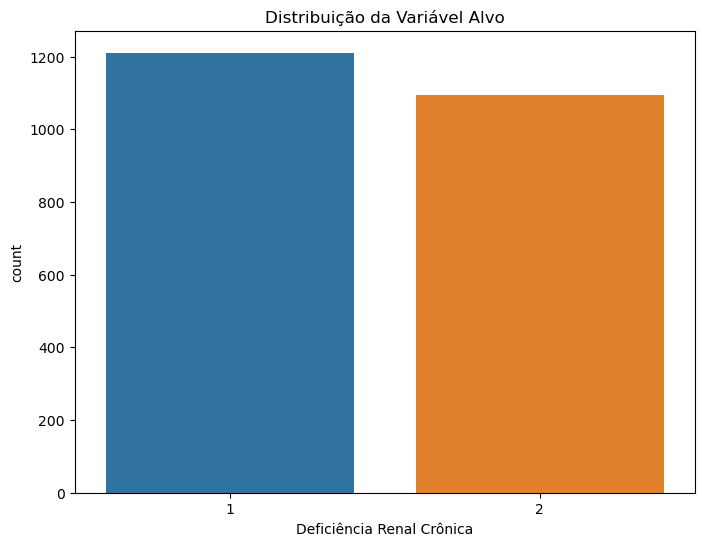

In [139]:
print("\nDistribuição da variável alvo:")
data['Q124'].value_counts()

# Visualizando a distribuição da variável alvo
plt.figure(figsize=(8, 6))
sns.countplot(x='Q124', data=data)
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Deficiência Renal Crônica')
plt.show()

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
X = data.drop('Q124', axis=1)  # Features
y = data['Q124']  # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:

modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# Avaliando o modelo
accuracy = modelo.score(X_test, y_test)
print("Acurácia do modelo:", accuracy)


Acurácia do modelo: 0.987012987012987


In [145]:
previsoes = modelo.predict(X_test)

In [147]:
!pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 991.0 kB/s eta 0:00:01
   ------- ------------------------------- 51.2/282.6 kB 650.2 kB/s eta 0:00:01
   ----------- --------------------------- 81.9/282.6 kB 651.6 kB/s eta 0:00:01
   ------------- ------------------------ 102.4/282.6 kB 653.6 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 607.9 kB/s eta 0:00:01
   ----------------------- -------------- 174.1/282.6 kB 615.9 kB/s eta 0:00:01
   ------------------------------ ------- 225.3/282.6 kB 687.0 kB/s eta 0:00:01
   -------------------------------------  276.5/282.6 kB 739.6 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 696.6 kB/s eta 0:00:00


C:\Users\Y044771\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.987012987012987

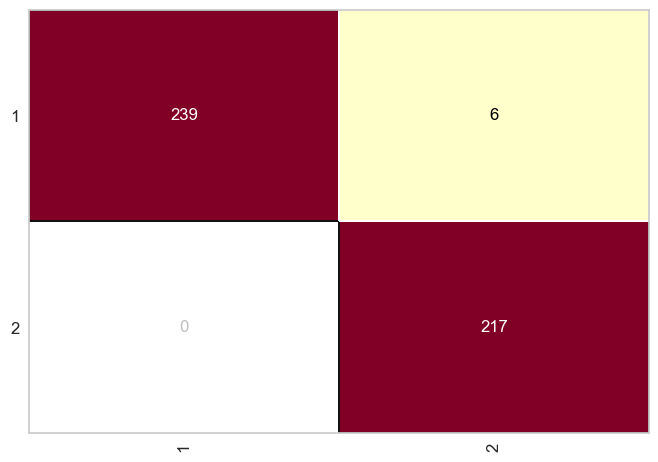

In [148]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)
cm = ConfusionMatrix(modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [152]:
y_pred_forest = modelo.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_forest)
precision_tree = precision_score(y_test, y_pred_forest)
recall_tree = recall_score(y_test, y_pred_forest)
f1_tree = f1_score(y_test, y_pred_forest)
conf_matrix_tree = confusion_matrix(y_test, y_pred_forest)

print("Métricas de Desempenho do Modelo de Árvore de Decisão:")
print(f"Acurácia: {accuracy_tree}")
print(f"Precisão: {precision_tree}")
print(f"Recall: {recall_tree}")
print(f"Pontuação F1: {f1_tree}")
print("\nMatriz de Confusão:")
print(conf_matrix_tree)

Métricas de Desempenho do Modelo de Árvore de Decisão:
Acurácia: 0.987012987012987
Precisão: 1.0
Recall: 0.9755102040816327
Pontuação F1: 0.9876033057851239

Matriz de Confusão:
[[239   6]
 [  0 217]]
